**Utilización de Prophet para predecir la demanda**

Para que se ejecute el código basta pulsar el símbolo "play" de la izquierda. Para consultar el pdf accesible del gráfico generado por el código hay que dirigirse al último icono de la izquierda, con forma de carpeta, que tendrá el nombre de prediccion_demanda.pdf. Además, tenemos las predicciones en la pantalla más abajo con sus rangos superiores e inferiores.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2clwfata/davvwske.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2clwfata/tj19z14q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5941', 'data', 'file=/tmp/tmp2clwfata/davvwske.json', 'init=/tmp/tmp2clwfata/tj19z14q.json', 'output', 'file=/tmp/tmp2clwfata/prophet_model7ow2yox4/prophet_model-20250513115936.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:59:36 - cmdstanpy - INFO - Chain [1] start processing
IN

           ds        yhat  yhat_lower  yhat_upper
19 2024-08-01  636.179740  619.405116  653.112368
20 2024-09-01  639.913148  623.939752  656.681545
21 2024-10-01  643.526124  625.893012  661.036438
22 2024-11-01  647.259532  631.065483  662.554660
23 2024-12-01  650.872508  633.881038  667.973527
24 2025-01-01  654.605917  637.821246  672.015003


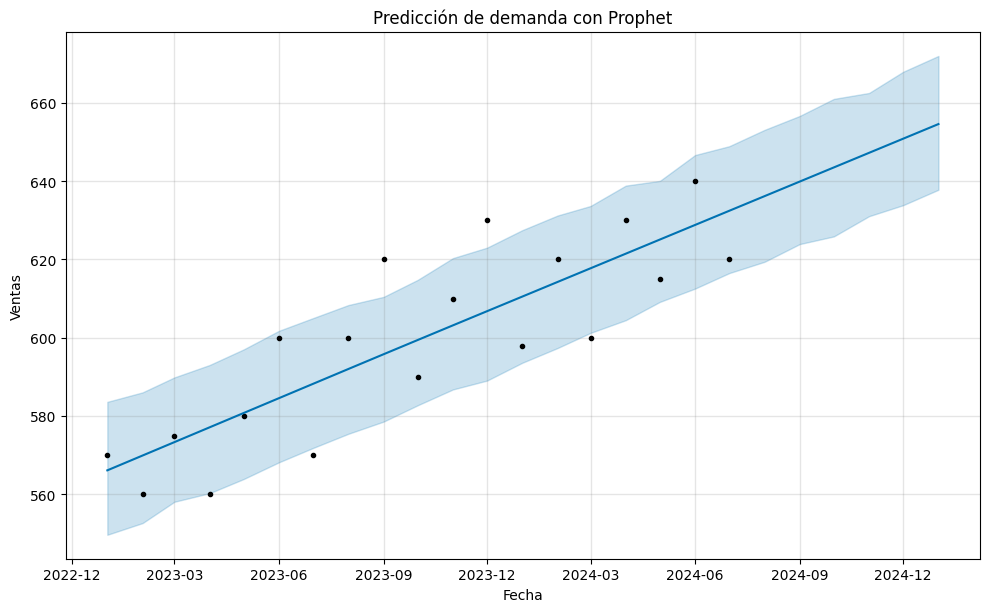

In [7]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

#Ponemos los datos de la tabla
data = {
    'Mes': list(range(1, 20)),
    'Ventas': [570, 560, 575, 560, 580, 600, 570, 600, 620, 590,
               610, 630, 598, 620, 600, 630, 615, 640, 620]
}

#Creamos el data frame
df = pd.DataFrame(data)

#Creamos fechas ficticias mensuales, una por cada mes de la tabla
df['ds'] = pd.date_range(start='2023-01-01', periods=len(df), freq='MS')
df['y'] = df['Ventas']
df = df[['ds', 'y']]

#Hacemos y ajustamos el modelo Prophet a nuestros datos
model = Prophet()
model.fit(df)

#Predecimos los próximos 6 meses
future = model.make_future_dataframe(periods=6, freq='MS')
forecast = model.predict(future)

#Mostramos las últimas 6 predicciones
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6))

#Graficamos los datos obtenidos
model.plot(forecast)
plt.title("Predicción de demanda con Prophet")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.show()


#Guardamos el gráfico como PDF accesible con texto seleccionable
with PdfPages("prediccion_demanda.pdf") as pdf:
    pdf.savefig(fig)
    plt.close(fig)

